### Градиентный спуск

1. Сигмоидная функция активации: sigmoid;
2. Формула предикта: output_formula;
3. Формула ошибки в точке: error_formula;
4. Функция обновления параметров с одним шагом градиентного спуска: update_weights

Генерируем случайные данные

In [122]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(1,8)
    plt.ylim(-1,8)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

#### Берем Iris Dataset из стандартной библиотеки

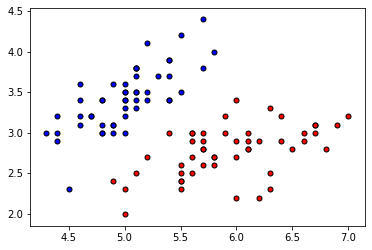

In [99]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:len(iris.target[iris.target<2]), :2]  # we only take the first two features.
y = iris.target[iris.target<2]
plot_points(X, y)
plt.show()

In [17]:
# Размерность
X.shape, y.shape[0]

((150, 2), 150)

In [68]:
def sigmoid(x):
    return 1/ ( 1 + np.exp(-x) )

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.matmul(features,weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -y*np.log(output) - (1- y)*np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

In [124]:
np.random.seed(44)

epochs = 100
learnrate = 0.01
targets_temp = []
out_temp = []

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    # the error for each epoch
    errors = []
    # the number of records and the number of features
    n_records, n_features = features.shape
    last_loss = None
    # start with random weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    print('Initial Random Weights: ', weights[0], weights[1])
    # start with a bias of 0
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            # calculate the output
            output = output_formula(x, weights, bias)
            # calculate the error
            error = error_formula(y, output)
            # update the weights and bias
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        # printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        #return targets, out
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()
    return weights, bias

Initial Random Weights:  -0.5307647566300506 0.9308051907683095

========== Epoch 0 ==========
Train loss:  1.8025753022969229
Accuracy:  0.5

========== Epoch 10 ==========
Train loss:  1.1563888979573624
Accuracy:  0.5

========== Epoch 20 ==========
Train loss:  0.74894118529741
Accuracy:  0.5

========== Epoch 30 ==========
Train loss:  0.5082502507966913
Accuracy:  0.6

========== Epoch 40 ==========
Train loss:  0.36841654199826124
Accuracy:  0.81

========== Epoch 50 ==========
Train loss:  0.2845039333231544
Accuracy:  0.87

========== Epoch 60 ==========
Train loss:  0.2313279538567583
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.19568610221223895
Accuracy:  0.97

========== Epoch 80 ==========
Train loss:  0.1705779243871168
Accuracy:  0.97

========== Epoch 90 ==========
Train loss:  0.1521329575055783
Accuracy:  0.98


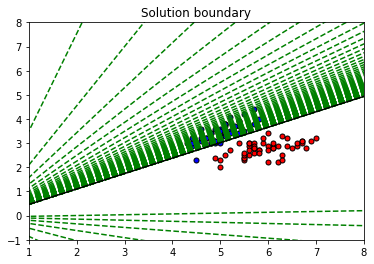

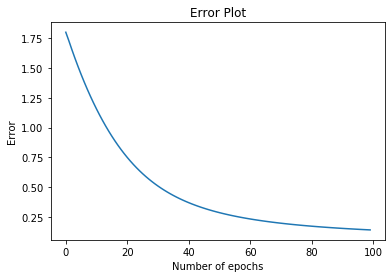

(array([ 2.92685502, -4.58568707]), -0.7830606374752364)

In [125]:
train(X, y, epochs, learnrate, True)